In [5]:
import boto3
import os
import re
import pickle
import json
import pandas as pd
import numpy as np
from datetime import datetime

from src.utils.general import get_s3_credentials, read_pkl_from_s3

In [6]:
s3_creds = get_s3_credentials("../../conf/local/credentials.yaml")

INFO:root:Leyendo las credenciales de ../../conf/local/credentials.yaml


In [7]:
session = boto3.Session(
    aws_access_key_id=s3_creds['aws_access_key_id'],
    aws_secret_access_key=s3_creds['aws_secret_access_key']
)
s3 = session.client('s3')

In [8]:
bucket='data-product-architecture-equipo-3'

In [9]:
objects = s3.list_objects_v2(Bucket=bucket)['Contents']

In [10]:
for file in objects:
    print(file['Key'])

best_model/YEAR=2021/MONTH=3/best_model_2021-03-29.pkl
best_model/YEAR=2021/MONTH=4/best_model_2021-04-19.pkl
best_model/YEAR=2021/MONTH=4/best_model_2021-04-26.pkl
feature_engineering/YEAR=2021/MONTH=3/feature_engineering_inspections_full_2021-03-29.pkl
feature_engineering/YEAR=2021/MONTH=3/feature_engineering_inspections_x_test_2021-03-29.pkl
feature_engineering/YEAR=2021/MONTH=3/feature_engineering_inspections_x_train_2021-03-29.pkl
feature_engineering/YEAR=2021/MONTH=3/feature_engineering_inspections_y_test_2021-03-29.pkl
feature_engineering/YEAR=2021/MONTH=3/feature_engineering_inspections_y_train_2021-03-29.pkl
feature_engineering/YEAR=2021/MONTH=4/feature_engineering_inspections_full_2021-04-19.pkl
feature_engineering/YEAR=2021/MONTH=4/feature_engineering_inspections_full_2021-04-26.pkl
feature_engineering/YEAR=2021/MONTH=4/feature_engineering_inspections_full_2021-04-27.pkl
feature_engineering/YEAR=2021/MONTH=4/feature_engineering_inspections_x_test_2021-04-19.pkl
feature_engin

In [11]:
fecha = "2021-04-19"

In [12]:
fecha = datetime.strptime(fecha, '%Y-%m-%d')

In [13]:
filename="feature_engineering/YEAR={}/MONTH={}/feature_engineering_inspections_x_test_{}.pkl".format(fecha.year,
                                                                                                    fecha.month,
                                                                                                    fecha.strftime('%Y-%m-%d'))
print("Leyendo {}...".format(filename))
x_test = read_pkl_from_s3(s3, bucket, filename)

Leyendo feature_engineering/YEAR=2021/MONTH=4/feature_engineering_inspections_x_test_2021-04-19.pkl...


In [14]:
filename="feature_engineering/YEAR={}/MONTH={}/feature_engineering_inspections_y_test_{}.pkl".format(fecha.year,
                                                                                                    fecha.month,
                                                                                                    fecha.strftime('%Y-%m-%d'))
print("Leyendo {}...".format(filename))
y_test = read_pkl_from_s3(s3, bucket, filename)

Leyendo feature_engineering/YEAR=2021/MONTH=4/feature_engineering_inspections_y_test_2021-04-19.pkl...


In [15]:
x_test

,one_hot__x0_bakery,one_hot__x0_catering,one_hot__x0_children's services facility,one_hot__x0_daycare (2 - 6 years),one_hot__x0_daycare (under 2 years),one_hot__x0_daycare above and under 2 years,one_hot__x0_grocery store,one_hot__x0_liquor,one_hot__x0_mobile food preparer,one_hot__x0_pop-up establishment host-tier ii,...,latitude,longitude,year,month,day,dayofweek,dayofyear,week,quarter,num_violations
223,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,41.98142816417737,-87.83643430209348,2021,4,16,4,106,15,2,6
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.9979753576967,-87.66981876108541,2021,4,16,4,106,15,2,4
225,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.88710295391923,-87.76568360364482,2021,4,16,4,106,15,2,0
226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.974176521817284,-87.8254778275599,2021,4,16,4,106,15,2,4
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.97621643722122,-87.6697616021359,2021,4,16,4,106,15,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.94001885475702,-87.70259824915517,2021,4,19,0,109,16,2,1
314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.80156348207917,-87.65491674033504,2021,4,19,0,109,16,2,19
315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.80862762829546,-87.6550409143026,2021,4,19,0,109,16,2,4
316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.885367821459624,-87.62244720125689,2021,4,19,0,109,16,2,0


In [16]:
filename="best_model/YEAR={}/MONTH={}/best_model_{}.pkl".format(fecha.year, fecha.month,fecha.strftime('%Y-%m-%d'))
print("Leyendo {}...".format(filename))
best_model = read_pkl_from_s3(s3, bucket, filename)

Leyendo best_model/YEAR=2021/MONTH=4/best_model_2021-04-19.pkl...


In [17]:
best_model
best_model = read_pkl_from_s3(s3, bucket, best_model)

In [18]:
predicted_scores = best_model.predict_proba(x_test)

In [19]:
def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,
                    'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df

In [20]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)
precision, recall, thresholds_2 = precision_recall_curve(y_test, predicted_scores[:,1], pos_label=1)
thresholds_2 = np.append(thresholds_2, 1)

In [21]:
# Verdadero Positivo: El modelo dice que sí va a pasar la inspección y realmente sí pasó la inspección
# Verdadero Negativo: El modelo dice que no va a pasar la inspección y realmente no pasó la inspección
# Falso Positivo: El modelo dice que sí va a pasar la inspección y realmente no pasó la inspección
# Falso Negativo: El modelo dice que no va a pasar la inspección y realmente sí pasó la inspección

Desde el punto de vista de que el usuario del modelo es el establecimiento, nuestro error a mejorar es Falso Positivo

In [22]:
# Precision : Proporción de que el modelo haya predicho que sí en el mundo (TP/TP+FP)
# Recall: Proporción de que el modelo haya predicho en sí en el mundo de etiquetas positivas (TP/TP+FN)

In [23]:
metrics_report = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
0,0.000000,0.684211,1.000000,0.812500,1.000000,1.000000,0.000000,0.000000
1,0.125000,0.717647,0.938462,0.813333,0.938462,0.800000,0.200000,0.061538
2,0.285714,0.762500,0.938462,0.841379,0.938462,0.633333,0.366667,0.061538
3,0.384615,0.766234,0.907692,0.830986,0.907692,0.600000,0.400000,0.092308
4,0.428571,0.794521,0.892308,0.840580,0.892308,0.500000,0.500000,0.107692
5,0.545455,0.814286,0.876923,0.844444,0.876923,0.433333,0.566667,0.123077
6,0.700000,0.828125,0.815385,0.821705,0.815385,0.366667,0.633333,0.184615
7,0.714286,0.923077,0.738462,0.820513,0.738462,0.133333,0.866667,0.261538
8,0.750000,0.911111,0.630769,0.745455,0.630769,0.133333,0.866667,0.369231
9,0.800000,0.921053,0.538462,0.679612,0.538462,0.100000,0.900000,0.461538


In [24]:
negocio = metrics_report[metrics_report.fpr <= 0.2]
negocio

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
7,0.714286,0.923077,0.738462,0.820513,0.738462,0.133333,0.866667,0.261538
8,0.750000,0.911111,0.630769,0.745455,0.630769,0.133333,0.866667,0.369231
9,0.800000,0.921053,0.538462,0.679612,0.538462,0.100000,0.900000,0.461538
10,0.857143,0.916667,0.338462,0.494382,0.338462,0.066667,0.933333,0.661538
11,1.000000,0.933333,0.215385,0.350000,0.215385,0.033333,0.966667,0.784615
12,1.000000,1.000000,0.000000,0.000000,0.215385,0.033333,0.966667,0.784615


In [25]:
negocio.threshold.values[0]

0.7142857142857143

In [26]:
punto_corte = negocio.head(1).threshold.values[0]
punto_corte

0.7142857142857143

In [27]:
new_labels = [0 if score < punto_corte else 1 for score in predicted_scores[:,1]]


# Aequitas

Nuestro modelo es ... porque

In [28]:
import aequitas

In [29]:
from src.utils.constants import PATH_PREPROCESS, NOMBRE_PREPROCESS

In [30]:
preprocess_file

NameError: name 'preprocess_file' is not defined

In [31]:
path_s3 = PATH_PREPROCESS.format(fecha.year, fecha.month)
preprocess_file = "{}/{}".format(path_s3, NOMBRE_PREPROCESS.format(fecha.strftime('%Y-%m-%d')))
clean_data = read_pkl_from_s3(s3, bucket, preprocess_file)

In [32]:
aequitas_df = clean_data.iloc[x_test.index,]

In [33]:
VARIABLES_PROTEGIDAS = ['facility_type', 'zip', 'inspection_type']

In [34]:
aequitas_df = pd.concat([aequitas_df[VARIABLES_PROTEGIDAS], aequitas_df['label']], axis=1)

In [35]:
aequitas_df = aequitas_df.rename(columns={'label':'label_value'})

In [36]:
#new_labels
aequitas_df['score'] = new_labels

In [37]:
aequitas_df

,facility_type,zip,inspection_type,label_value,score
223,restaurant,60631,complaint re-inspection,0,0
224,grocery store,60631,canvass,1,1
225,restaurant,60660,canvass,1,1
226,children's services facility,60644,license re-inspection,1,1
227,school,60656,canvass,1,1
...,...,...,...,...,...
313,restaurant,60625,non-inspection,0,1
314,school,60618,canvass re-inspection,1,0
315,restaurant,60609,canvass,0,1
316,restaurant,60609,canvass,1,0


In [43]:
from aequitas.preprocessing import preprocess_input_df

# double-check that categorical columns are of type 'string'
#aequitas_df['facility_type'] = aequitas_df['facility_type'].astype(str)
#aequitas_df['zip'] = aequitas_df['zip'].astype(str)
#aequitas_df['inspection_type'] = aequitas_df['inspection_type'].astype(str)

df, _ = preprocess_input_df(aequitas_df)

In [48]:
df

,facility_type,zip,inspection_type,label_value,score
223,restaurant,60631,complaint re-inspection,0,0.0
224,grocery store,60631,canvass,1,1.0
225,restaurant,60660,canvass,1,1.0
226,children's services facility,60644,license re-inspection,1,1.0
227,school,60656,canvass,1,1.0
...,...,...,...,...,...
313,restaurant,60625,non-inspection,0,1.0
314,school,60618,canvass re-inspection,1,0.0
315,restaurant,60609,canvass,0,1.0
316,restaurant,60609,canvass,1,0.0


In [49]:
from aequitas.group import Group
    
g = Group()
xtab, attrbs = g.get_crosstabs(df)

INFO:root:getcrosstabs: attribute columns to perform crosstabs:facility_type,zip,inspection_type


In [50]:
pd.options.display.max_columns = None

In [51]:
xtab

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,52,facility_type,bakery,0.000000,NaN,1.000000,NaN,NaN,1.000000,0.000000,NaN,0,1,0.000000,0.000000,0,1,0,0,1,0,1,95,1.000000
1,0,binary 0/1,52,facility_type,children's services facility,0.500000,NaN,1.000000,0.000000,NaN,0.500000,0.000000,1.000000,1,1,0.019231,0.500000,0,1,0,1,2,0,2,95,1.000000
2,0,binary 0/1,52,facility_type,daycare (2 - 6 years),0.000000,NaN,1.000000,NaN,NaN,1.000000,0.000000,NaN,0,1,0.000000,0.000000,0,1,0,0,1,0,1,95,1.000000
3,0,binary 0/1,52,facility_type,daycare above and under 2 years,1.000000,0.500000,0.000000,0.500000,0.500000,0.000000,1.000000,0.500000,2,1,0.038462,0.666667,1,0,1,1,1,2,3,95,0.333333
4,0,binary 0/1,52,facility_type,grocery store,0.625000,0.500000,0.750000,0.166667,0.500000,0.375000,0.250000,0.833333,6,4,0.115385,0.600000,1,3,1,5,8,2,10,95,0.800000
5,0,binary 0/1,52,facility_type,restaurant,0.526316,0.400000,0.642857,0.428571,0.600000,0.473684,0.357143,0.571429,35,28,0.673077,0.555556,15,18,10,20,38,25,63,95,0.603175
6,0,binary 0/1,52,facility_type,school,0.545455,1.000000,0.833333,0.000000,0.000000,0.454545,0.166667,1.000000,6,6,0.115385,0.500000,0,5,1,6,11,1,12,95,0.916667
7,0,binary 0/1,52,facility_type,special event,1.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,1.000000,1,0,0.019231,1.000000,0,0,0,1,1,0,1,95,1.000000
8,0,binary 0/1,52,facility_type,store,0.000000,NaN,1.000000,NaN,NaN,1.000000,0.000000,NaN,0,1,0.000000,0.000000,0,1,0,0,1,0,1,95,1.000000
9,0,binary 0/1,52,facility_type,unknown_facility_type,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,0.000000,1,0,0.019231,1.000000,1,0,0,0,0,1,1,95,0.000000


In [52]:
attrbs

Index(['facility_type', 'zip', 'inspection_type'], dtype='object')

In [53]:
absolute_metrics = g.list_absolute_metrics(xtab)
absolute_metrics

['tpr',
 'tnr',
 'for',
 'fdr',
 'fpr',
 'fnr',
 'npv',
 'precision',
 'ppr',
 'pprev',
 'prev']

In [54]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]


,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,52,facility_type,bakery,0,1,0,1,0,0,1,0,1,95
1,0,binary 0/1,52,facility_type,children's services facility,1,1,0,1,0,1,2,0,2,95
2,0,binary 0/1,52,facility_type,daycare (2 - 6 years),0,1,0,1,0,0,1,0,1,95
3,0,binary 0/1,52,facility_type,daycare above and under 2 years,2,1,1,0,1,1,1,2,3,95
4,0,binary 0/1,52,facility_type,grocery store,6,4,1,3,1,5,8,2,10,95
5,0,binary 0/1,52,facility_type,restaurant,35,28,15,18,10,20,38,25,63,95
6,0,binary 0/1,52,facility_type,school,6,6,0,5,1,6,11,1,12,95
7,0,binary 0/1,52,facility_type,special event,1,0,0,0,0,1,1,0,1,95
8,0,binary 0/1,52,facility_type,store,0,1,0,1,0,0,1,0,1,95
9,0,binary 0/1,52,facility_type,unknown_facility_type,1,0,1,0,0,0,0,1,1,95


In [55]:
bias_tot = xtab[['attribute_name', 'attribute_value']+[col for col in xtab.columns if col in absolute_metrics]].round(2)
bias_tot[(bias_tot.attribute_name == 'facility_type') | (bias_tot.attribute_name == 'inspection_type')]

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,facility_type,bakery,0.00,NaN,1.00,NaN,NaN,1.00,0.00,NaN,0.00,0.00,1.00
1,facility_type,children's services facility,0.50,NaN,1.00,0.00,NaN,0.50,0.00,1.00,0.02,0.50,1.00
2,facility_type,daycare (2 - 6 years),0.00,NaN,1.00,NaN,NaN,1.00,0.00,NaN,0.00,0.00,1.00
3,facility_type,daycare above and under 2 years,1.00,0.50,0.00,0.50,0.50,0.00,1.00,0.50,0.04,0.67,0.33
4,facility_type,grocery store,0.62,0.50,0.75,0.17,0.50,0.38,0.25,0.83,0.12,0.60,0.80
5,facility_type,restaurant,0.53,0.40,0.64,0.43,0.60,0.47,0.36,0.57,0.67,0.56,0.60
6,facility_type,school,0.55,1.00,0.83,0.00,0.00,0.45,0.17,1.00,0.12,0.50,0.92
7,facility_type,special event,1.00,NaN,NaN,0.00,NaN,0.00,NaN,1.00,0.02,1.00,1.00
8,facility_type,store,0.00,NaN,1.00,NaN,NaN,1.00,0.00,NaN,0.00,0.00,1.00
9,facility_type,unknown_facility_type,NaN,0.00,NaN,1.00,1.00,NaN,NaN,0.00,0.02,1.00,0.00


In [56]:
from aequitas.plotting import Plot
aeq = Plot()


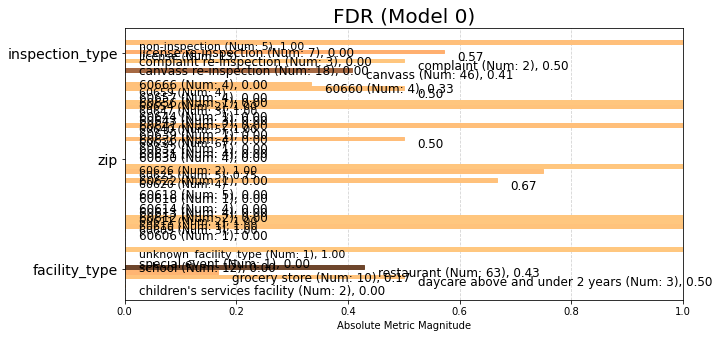

In [57]:
fdr = aeq.plot_group_metric(xtab, 'fdr')


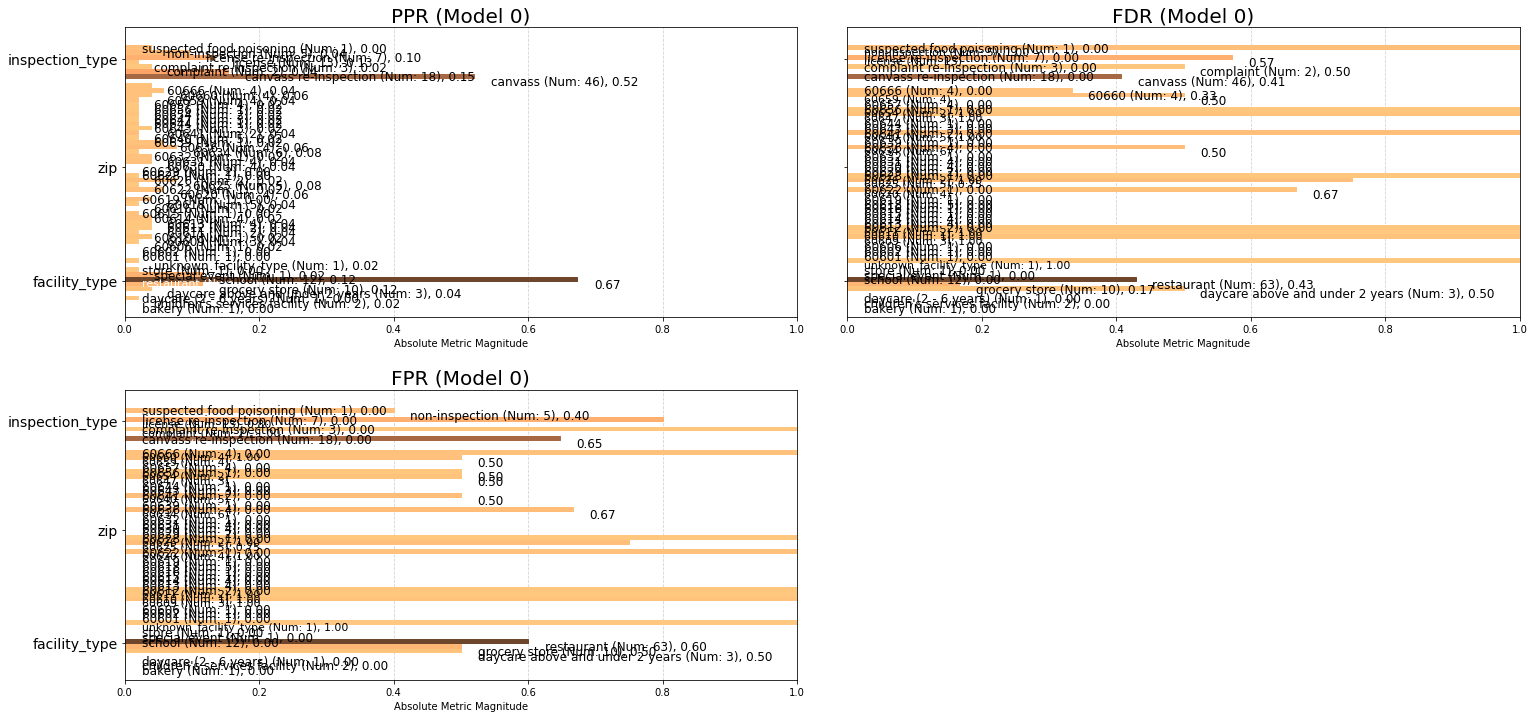

<Figure size 432x288 with 0 Axes>

In [58]:
p = aeq.plot_group_metric_all(xtab, metrics=['ppr','fdr','fpr'], ncols=2)


In [59]:
from aequitas.bias import Bias
bias = Bias()

In [60]:
aequitas_df.groupby('facility_type')['zip'].count()

facility_type
bakery                              1
children's services facility        2
daycare (2 - 6 years)               1
daycare above and under 2 years     3
grocery store                      10
restaurant                         63
school                             12
special event                       1
store                               1
unknown_facility_type               1
Name: zip, dtype: int64

In [61]:
aequitas_df.groupby('zip')['facility_type'].count()

zip
60601    1
60602    1
60606    1
60609    3
60610    1
60611    2
60612    2
60613    4
60614    4
60615    1
60616    1
60618    5
60619    1
60620    4
60622    1
60625    5
60626    2
60628    1
60629    2
60630    4
60631    4
60632    1
60634    6
60636    4
60639    1
60640    5
60641    2
60643    3
60644    1
60647    3
60654    2
60656    1
60657    4
60659    4
60660    4
60666    4
Name: facility_type, dtype: int64

In [62]:
aequitas_df.groupby('inspection_type')['zip'].count()

inspection_type
canvass                     46
canvass re-inspection       18
complaint                    2
complaint re-inspection      3
license                     13
license re-inspection        7
non-inspection               5
suspected food poisoning     1
Name: zip, dtype: int64

In [63]:

bdf = bias.get_disparity_predefined_groups(xtab, original_df=aequitas_df, 
                                        ref_groups_dict={'facility_type':'restaurant', 
                                                         'zip':'60634', 
                                                         'inspection_type':'canvass'}, 
                                        alpha=0.05)

get_disparity_predefined_group()


In [64]:
# View disparity metrics added to dataframe
bdf_ = bdf[['attribute_name', 'attribute_value'] +
     bias.list_disparities(bdf)].round(2)

In [66]:
bdf_.dtypes

attribute_name          object
attribute_value         object
ppr_disparity          float64
pprev_disparity        float64
precision_disparity    float64
fdr_disparity          float64
for_disparity          float64
fpr_disparity          float64
fnr_disparity          float64
tpr_disparity          float64
tnr_disparity          float64
npv_disparity          float64
dtype: object

In [86]:
majority_bdf = bias.get_disparity_major_group(xtab, original_df=aequitas_df)


get_disparity_major_group()


In [87]:
majority_bdf[['attribute_name', 'attribute_value'] +  bias.list_disparities(majority_bdf)].round(2)


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,facility_type,bakery,0.00,0.00,NaN,NaN,1.56,NaN,2.11,0.00,NaN,0.00
1,facility_type,children's services facility,0.03,0.90,1.75,0.00,1.56,NaN,1.06,0.95,NaN,0.00
2,facility_type,daycare (2 - 6 years),0.00,0.00,NaN,NaN,1.56,NaN,2.11,0.00,NaN,0.00
3,facility_type,daycare above and under 2 years,0.06,1.20,0.88,1.17,0.00,0.83,0.00,1.90,1.25,2.80
4,facility_type,grocery store,0.17,1.08,1.46,0.39,1.17,0.83,0.79,1.19,1.25,0.70
5,facility_type,restaurant,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
6,facility_type,school,0.17,0.90,1.75,0.00,1.30,0.00,0.96,1.04,2.50,0.47
7,facility_type,special event,0.03,1.80,1.75,0.00,NaN,NaN,0.00,1.90,NaN,NaN
8,facility_type,store,0.00,0.00,NaN,NaN,1.56,NaN,2.11,0.00,NaN,0.00
9,facility_type,unknown_facility_type,0.03,1.80,0.00,2.33,NaN,1.67,NaN,NaN,0.00,NaN


In [88]:
min_bdf = bias.get_disparity_min_metric(xtab, original_df=aequitas_df)


get_disparity_min_metric()


In [136]:
min_bdf[['attribute_name', 'attribute_value'] +  bias.list_disparities(min_bdf)].round(2)


,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,facility_type,bakery,NaN,NaN,NaN,NaN,1.50,NaN,10.0,NaN,NaN,NaN
1,facility_type,children's services facility,10.0,10.0,10.0,NaN,1.50,NaN,10.0,10.00,NaN,NaN
2,facility_type,daycare (2 - 6 years),10.0,10.0,10.0,NaN,NaN,NaN,NaN,10.00,NaN,NaN
3,facility_type,daycare above and under 2 years,10.0,10.0,10.0,10.0,NaN,10.0,NaN,10.00,NaN,NaN
4,facility_type,grocery store,10.0,10.0,10.0,10.0,1.12,10.0,10.0,10.00,10.0,10.0
5,facility_type,restaurant,10.0,10.0,10.0,10.0,1.12,10.0,10.0,10.00,10.0,10.0
6,facility_type,school,10.0,10.0,10.0,NaN,1.00,NaN,10.0,10.00,10.0,10.0
7,facility_type,special event,10.0,10.0,10.0,NaN,NaN,NaN,NaN,10.00,NaN,NaN
8,facility_type,store,NaN,NaN,NaN,NaN,1.50,NaN,10.0,NaN,NaN,NaN
9,facility_type,unknown_facility_type,10.0,10.0,NaN,10.0,NaN,10.0,NaN,NaN,NaN,NaN


In [137]:
from aequitas.fairness import Fairness

In [139]:
fair = Fairness()

In [140]:
fdf = fair.get_group_value_fairness(bdf)


INFO:root:get_group_value_fairness...


In [141]:
parity_determinations = fair.list_parities(fdf)


In [142]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + 
    bias.list_disparities(fdf) + parity_determinations].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,...,Supervised Fairness,TypeI Parity,Statistical Parity,Equalized Odds,FNR Parity,TNR Parity,TPR Parity,NPV Parity,FOR Parity,Precision Parity
0,facility_type,bakery,0.00,NaN,1.00,NaN,NaN,1.00,0.00,NaN,...,False,NaN,False,False,False,NaN,False,False,False,NaN
1,facility_type,children's services facility,0.50,NaN,1.00,0.00,NaN,0.50,0.00,1.00,...,False,False,False,False,False,NaN,False,False,False,False
2,facility_type,daycare (2 - 6 years),1.00,NaN,NaN,0.00,NaN,0.00,NaN,1.00,...,False,False,False,False,False,NaN,False,NaN,NaN,False
3,facility_type,daycare above and under 2 years,1.00,0.00,NaN,0.67,1.00,0.00,NaN,0.33,...,False,False,False,False,False,False,False,NaN,NaN,False
4,facility_type,grocery store,0.62,0.50,0.75,0.17,0.50,0.38,0.25,0.83,...,False,False,False,False,False,False,True,True,True,False
5,facility_type,restaurant,0.76,0.12,0.75,0.43,0.88,0.24,0.25,0.57,...,True,True,True,True,True,True,True,True,True,True
6,facility_type,school,0.82,1.00,0.67,0.00,0.00,0.18,0.33,1.00,...,False,False,False,False,False,False,True,False,True,False
7,facility_type,special event,1.00,NaN,NaN,0.00,NaN,0.00,NaN,1.00,...,False,False,False,False,False,NaN,False,NaN,NaN,False
8,facility_type,store,0.00,NaN,1.00,NaN,NaN,1.00,0.00,NaN,...,False,NaN,False,False,False,NaN,False,False,False,NaN
9,facility_type,unknown_facility_type,NaN,0.00,NaN,1.00,1.00,NaN,NaN,0.00,...,False,False,False,False,NaN,False,NaN,NaN,NaN,False


In [143]:
fairness = fdf[['attribute_name', 'attribute_value'] + absolute_metrics + 
    bias.list_disparities(fdf) + parity_determinations].round(2)

In [144]:
fairness[['attribute_name', 'attribute_value', 'fdr', 'for','fpr','fnr']]


,attribute_name,attribute_value,fdr,for,fpr,fnr
0,facility_type,bakery,NaN,1.00,NaN,1.00
1,facility_type,children's services facility,0.00,1.00,NaN,0.50
2,facility_type,daycare (2 - 6 years),0.00,NaN,NaN,0.00
3,facility_type,daycare above and under 2 years,0.67,NaN,1.00,0.00
4,facility_type,grocery store,0.17,0.75,0.50,0.38
5,facility_type,restaurant,0.43,0.75,0.88,0.24
6,facility_type,school,0.00,0.67,0.00,0.18
7,facility_type,special event,0.00,NaN,NaN,0.00
8,facility_type,store,NaN,1.00,NaN,1.00
9,facility_type,unknown_facility_type,1.00,NaN,1.00,NaN


In [145]:
gaf = fair.get_group_attribute_fairness(fdf)
gaf

INFO:root:get_group_attribute_fairness
INFO:root:fill_groupby_attribute_fairness
INFO:root:fill_groupby_attribute_fairness
INFO:root:fill_groupby_attribute_fairness


,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,facility_type,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,binary 0/1,inspection_type,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,binary 0/1,zip,False,False,False,False,NaN,False,False,False,NaN,False,False,False,False,False,False


In [146]:
fdf

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,73,facility_type,bakery,0.000000,NaN,1.000000,NaN,NaN,...,False,False,NaN,False,NaN,NaN,False,False,False,False
1,0,binary 0/1,73,facility_type,children's services facility,0.500000,NaN,1.000000,0.000000,NaN,...,False,False,NaN,False,False,False,False,False,False,False
2,0,binary 0/1,73,facility_type,daycare (2 - 6 years),1.000000,NaN,NaN,0.000000,NaN,...,False,False,NaN,NaN,False,False,False,False,False,False
3,0,binary 0/1,73,facility_type,daycare above and under 2 years,1.000000,0.000000,NaN,0.666667,1.000000,...,False,False,False,NaN,False,False,False,False,False,False
4,0,binary 0/1,73,facility_type,grocery store,0.625000,0.500000,0.750000,0.166667,0.500000,...,False,True,False,True,False,False,False,False,False,False
5,0,binary 0/1,73,facility_type,restaurant,0.763158,0.120000,0.750000,0.431373,0.880000,...,True,True,True,True,True,True,True,True,True,True
6,0,binary 0/1,73,facility_type,school,0.818182,1.000000,0.666667,0.000000,0.000000,...,False,True,False,False,False,False,False,False,False,False
7,0,binary 0/1,73,facility_type,special event,1.000000,NaN,NaN,0.000000,NaN,...,False,False,NaN,NaN,False,False,False,False,False,False
8,0,binary 0/1,73,facility_type,store,0.000000,NaN,1.000000,NaN,NaN,...,False,False,NaN,False,NaN,NaN,False,False,False,False
9,0,binary 0/1,73,facility_type,unknown_facility_type,NaN,0.000000,NaN,1.000000,1.000000,...,NaN,NaN,False,NaN,False,False,NaN,False,False,False


In [147]:

gof = fair.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

In [149]:
z = aeq.plot_fairness_group(fdf, group_metric='fdr')

ValueError: Cannot plot fdr, has NaN values.